## Inferential Statistics and Predictive Analysis
#### Ayush Lavania[RA2211047010069]
### 21AIC401T: Customer Churn Prediction - Case Study

### Task 1: Data Preparation and Introduction

### 1.1 Load Libraries and Dataset

This first step involves importing the necessary Python libraries for data analysis and visualization (`pandas`, `matplotlib`, `seaborn`).

[cite_start]We will then load the **Telco Customer Churn dataset** downloaded from Kaggle[cite: 24]. [cite_start]We will perform three initial checks as required by the assignment[cite: 31, 32]:
1.  **`.head()`**: View the first few rows to understand the columns and data structure.
2.  **`.info()`**: Check for any missing (null) values and see the data types (e.g., object, int, float) for each column.
3.  **`.duplicated().sum()`**: Check if there are any duplicate rows in the dataset.

In [1]:
# --- 1. Load Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visual style for plots
sns.set(style="whitegrid")

# --- 2. Load Data ---
# Make sure you have the 'WA_Fn-UseC_-Telco-Customer-Churn.csv' file
# in the same directory as your notebook, or provide the full path.
try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    
    # --- 3. Initial Inspection (Data Description & Cleaning) [cite: 31, 32] ---
    print("--- 1. First 5 Rows of the Dataset ---")
    display(df.head())
    
    print("\n--- 2. Dataset Info (Checking for Missing Values & Data Types) ---")
    df.info()
    
    print("\n--- 3. Checking for Duplicate Rows ---")
    duplicate_count = df.duplicated().sum()
    print(f"Total duplicate rows found: {duplicate_count}")

except FileNotFoundError:
    print("Error: The file 'WA_Fn-UseC_-Telco-Customer-Churn.csv' was not found.")
    print("Please download it from Kaggle and place it in the correct directory.")

--- 1. First 5 Rows of the Dataset ---


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



--- 2. Dataset Info (Checking for Missing Values & Data Types) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          704

### 1.2 Data Cleaning & Target Variable Analysis

Based on the `.info()` output from the previous step, we observed two things:
1.  The `TotalCharges` column is an `object` type, not a number. It needs to be converted to a numeric format. Any values that cannot be converted (like empty strings) will become `NaN` (missing values).
2.  The `customerID` column is a unique identifier for each customer and is not a useful feature for prediction. We will drop it.

[cite_start]After conversion, we will handle the new missing values  by simply dropping the rows, as it's the most straightforward cleaning method.

[cite_start]Finally, we will define our target variable `Churn`  [cite_start]and create our first visualization to see the class distribution (i.e., how many customers churned vs. stayed). This is critical for understanding if our dataset is "imbalanced."

Missing values in 'TotalCharges' after conversion: 11

--- Distribution of Target Variable: Churn ---
       Count  Percentage
Churn                   
No      5163   73.421502
Yes     1869   26.578498


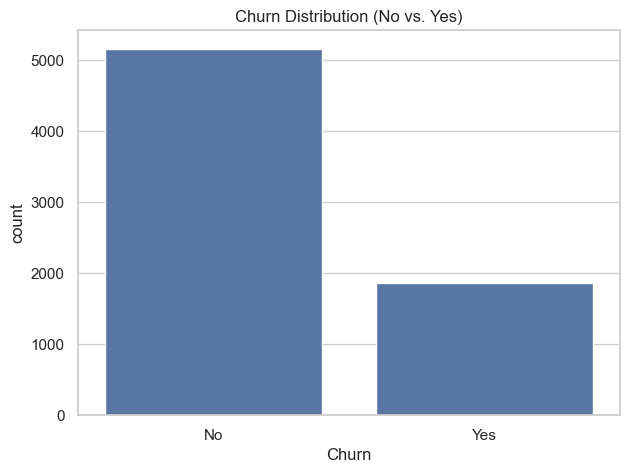

In [2]:
# --- 1. Data Cleaning: Convert 'TotalCharges' to numeric ---
# 'errors=coerce' will turn any non-numeric values (like empty strings) into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# --- 2. Data Cleaning: Handle Missing Values ---
# Check how many missing values were created
print(f"Missing values in 'TotalCharges' after conversion: {df['TotalCharges'].isnull().sum()}")

# Drop rows with any missing values 
df.dropna(inplace=True)

# --- 3. Feature Engineering: Drop 'customerID' ---
# Drop the customerID column as it's not a predictive feature
df = df.drop('customerID', axis=1)

# --- 4. Define Target and Predictor Variables (EDA) ---
# Define our target variable 
target_variable = 'Churn'

# --- 5. Conduct EDA: Visualize the Target Variable  ---
print(f"\n--- Distribution of Target Variable: {target_variable} ---")

# Create a count plot to visualize the 'Churn' column
plt.figure(figsize=(7, 5))
sns.countplot(x=target_variable, data=df)
plt.title('Churn Distribution (No vs. Yes)')

# Calculate and print the percentage
churn_percentage = (df[target_variable].value_counts(normalize=True) * 100).rename('Percentage')
churn_counts = df[target_variable].value_counts().rename('Count')
print(pd.concat([churn_counts, churn_percentage], axis=1))

# Show the plot
plt.show()

### 1.3 EDA: Numerical Variable Analysis

Now we perform Exploratory Data Analysis (EDA) on the numerical features to understand their relationship with `Churn`.

We will iterate through our main numerical columns (`tenure`, `MonthlyCharges`, `TotalCharges`) and create a Kernel Density Estimate (KDE) plot for each.

These plots will help us visualize the distribution of each feature, separated by customers who churned (`Churn`='Yes') and those who stayed (`Churn`='No'). This can reveal important patterns (e.g., "Do customers with lower tenure churn more?").

--- EDA: Analyzing Numerical Features vs. Churn ---


C:\Users\hp pavillion\AppData\Local\Temp\ipykernel_14092\1105170387.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'No'][col], label='Churn: No', shade=True, color='blue')
C:\Users\hp pavillion\AppData\Local\Temp\ipykernel_14092\1105170387.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'Yes'][col], label='Churn: Yes', shade=True, color='red')


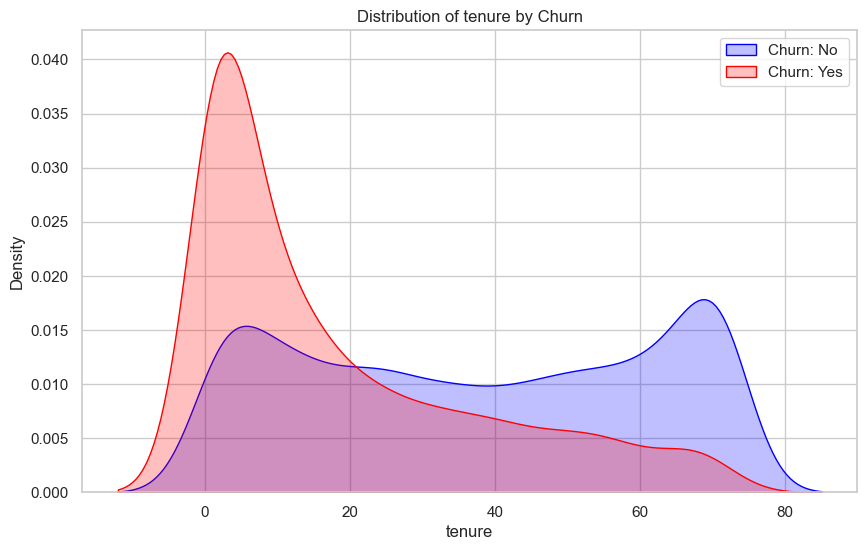

C:\Users\hp pavillion\AppData\Local\Temp\ipykernel_14092\1105170387.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'No'][col], label='Churn: No', shade=True, color='blue')
C:\Users\hp pavillion\AppData\Local\Temp\ipykernel_14092\1105170387.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'Yes'][col], label='Churn: Yes', shade=True, color='red')


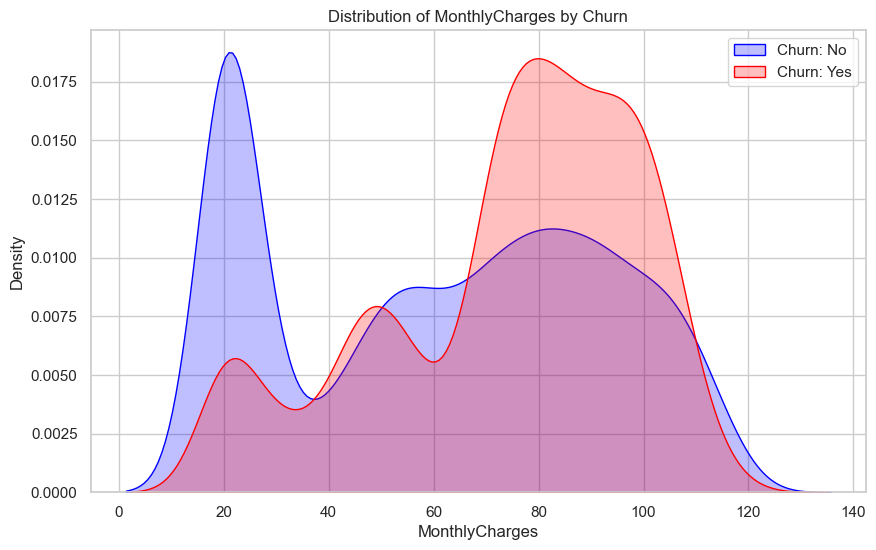

C:\Users\hp pavillion\AppData\Local\Temp\ipykernel_14092\1105170387.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'No'][col], label='Churn: No', shade=True, color='blue')
C:\Users\hp pavillion\AppData\Local\Temp\ipykernel_14092\1105170387.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'Yes'][col], label='Churn: Yes', shade=True, color='red')


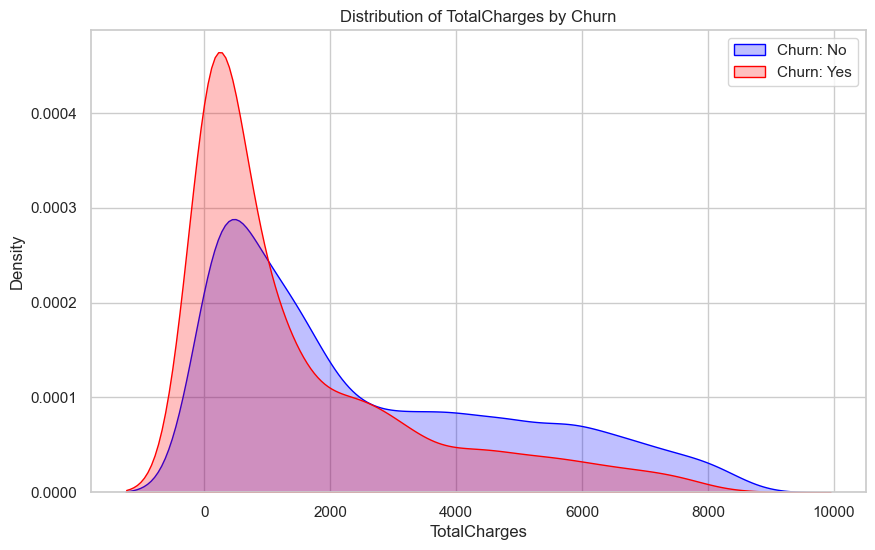

In [3]:
# --- 1. Identify Numerical Predictor Variables ---
# From our .info() earlier, we know these are our numeric features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("--- EDA: Analyzing Numerical Features vs. Churn ---")

# --- 2. Loop and Plot (KDE Plots) ---
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    
    # Plot KDE for customers who did NOT churn
    sns.kdeplot(df[df['Churn'] == 'No'][col], label='Churn: No', shade=True, color='blue')
    
    # Plot KDE for customers who DID churn
    sns.kdeplot(df[df['Churn'] == 'Yes'][col], label='Churn: Yes', shade=True, color='red')
    
    # Add titles and labels
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    
    # Show the plot
    plt.show()

### 1.4 EDA: Categorical Variable Analysis

Next, we analyze the categorical features to see their impact on churn.

We will iterate through our main categorical columns and create a `countplot` for each. We will use the `hue='Churn'` parameter in our plots.

This will create stacked bar charts, allowing us to easily see not just the total number of customers in each category (e.g., "Month-to-month" contract), but also the proportion of those customers who churned vs. stayed. This is one of the most effective ways to find key drivers of churn.

--- EDA: Analyzing Categorical Features vs. Churn ---


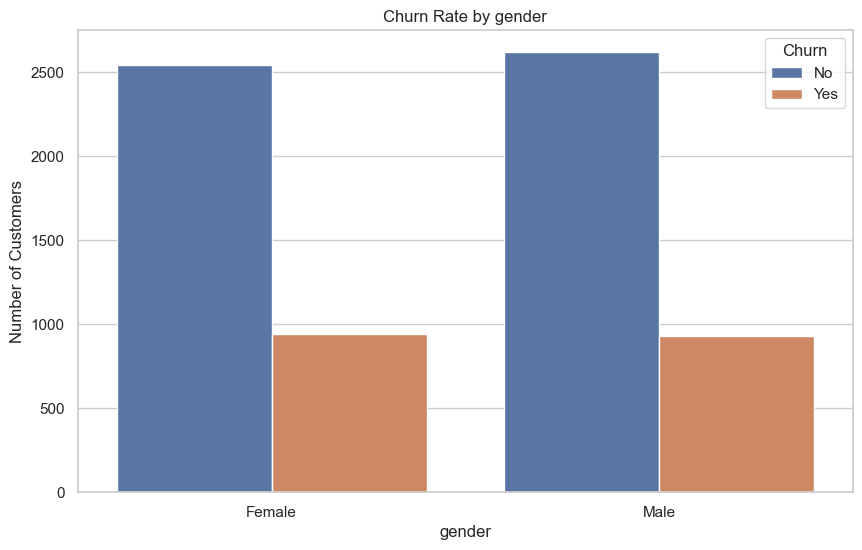

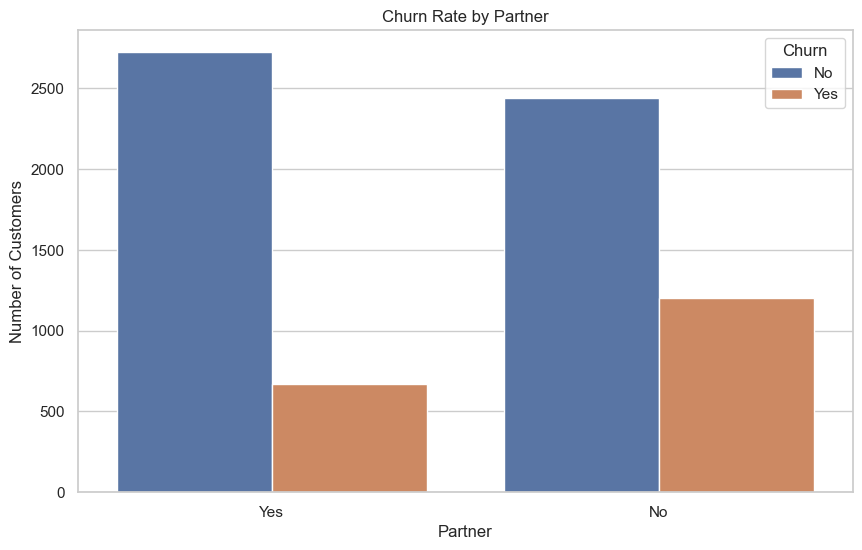

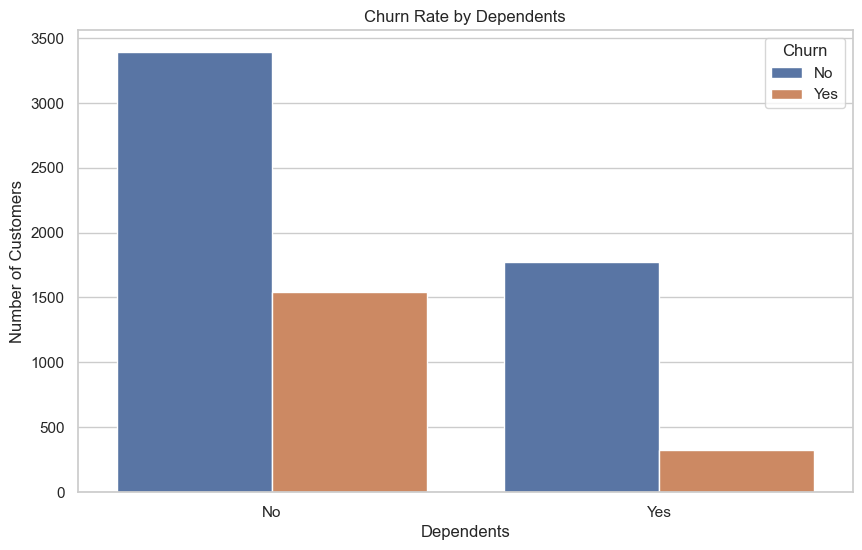

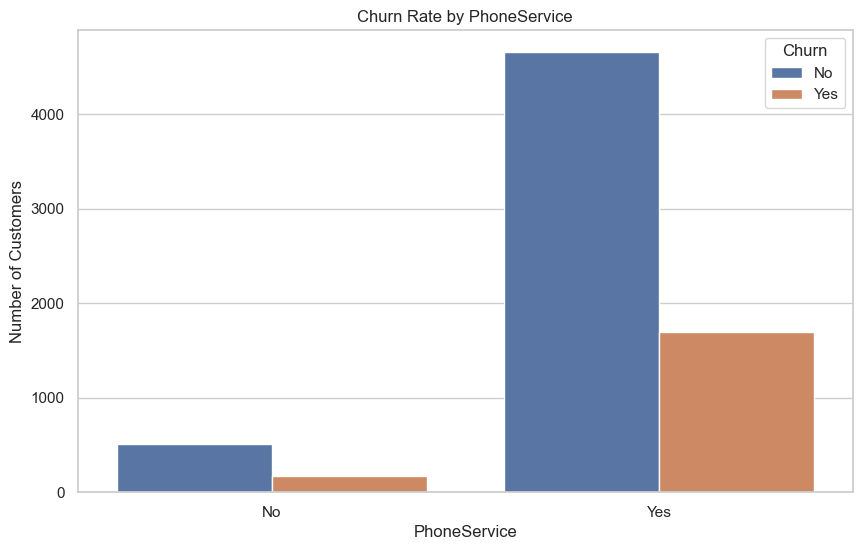

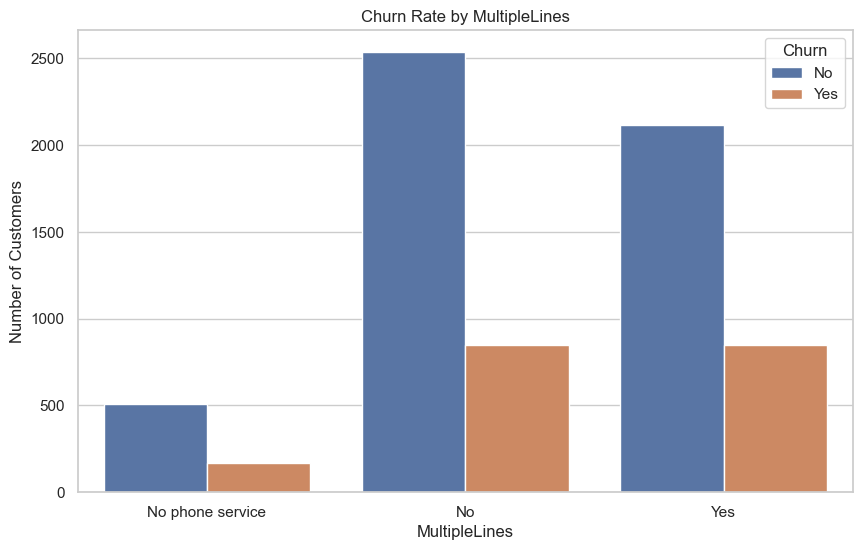

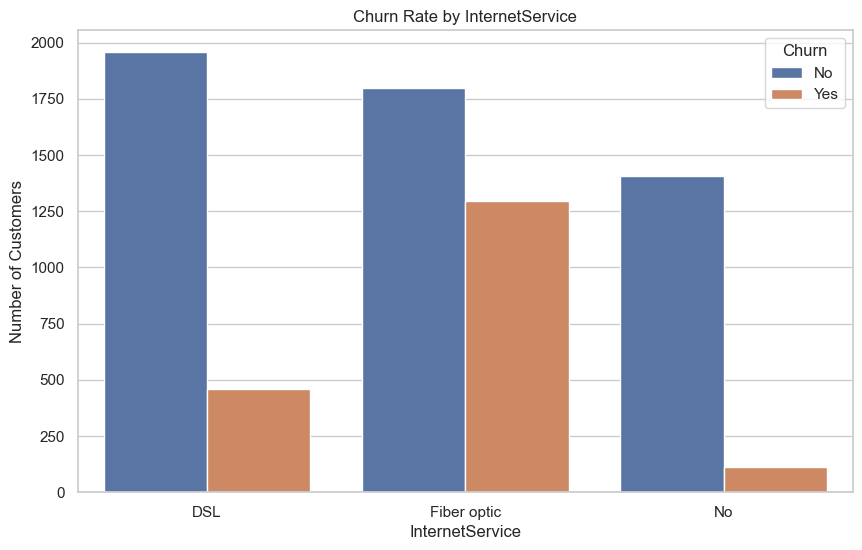

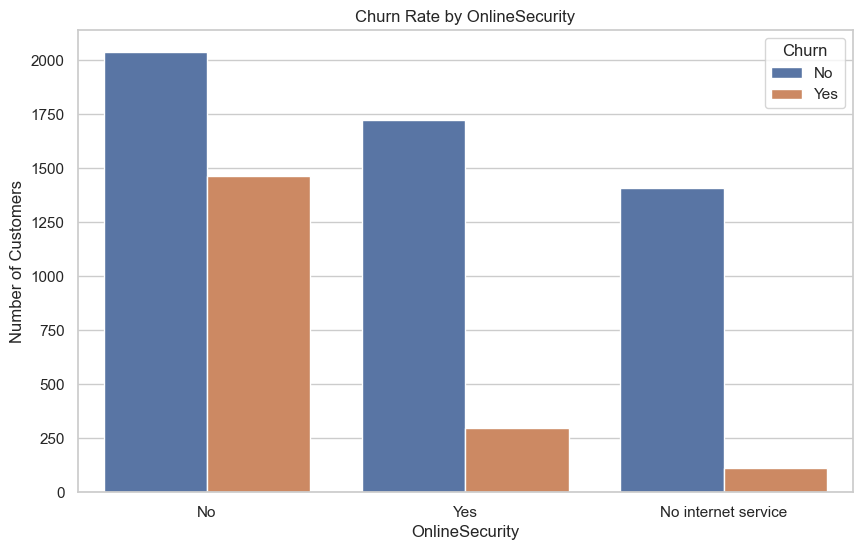

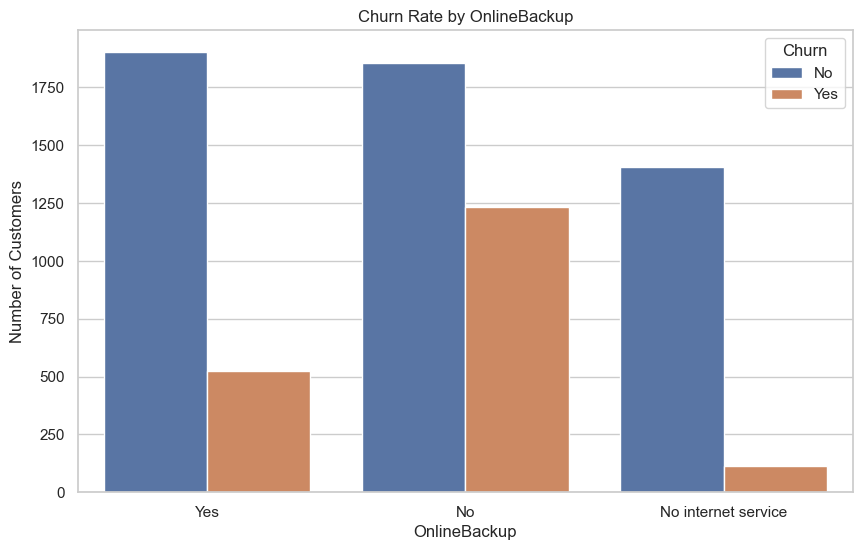

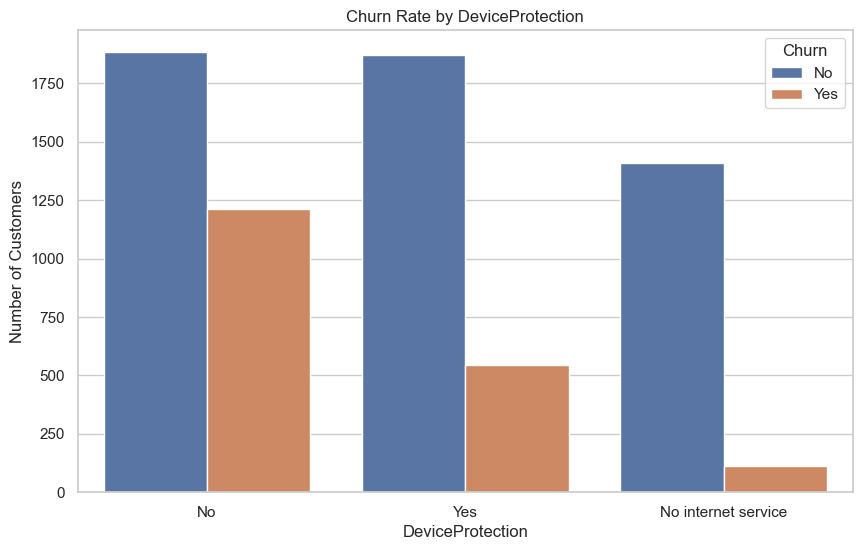

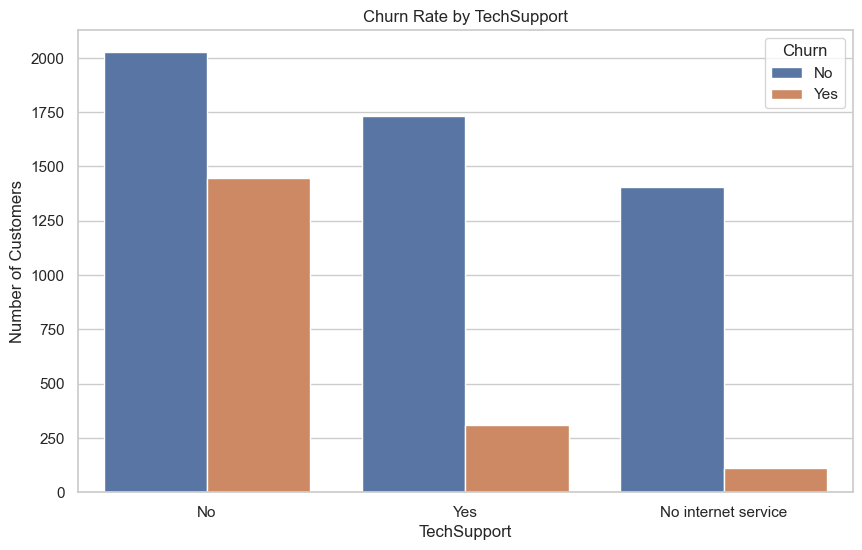

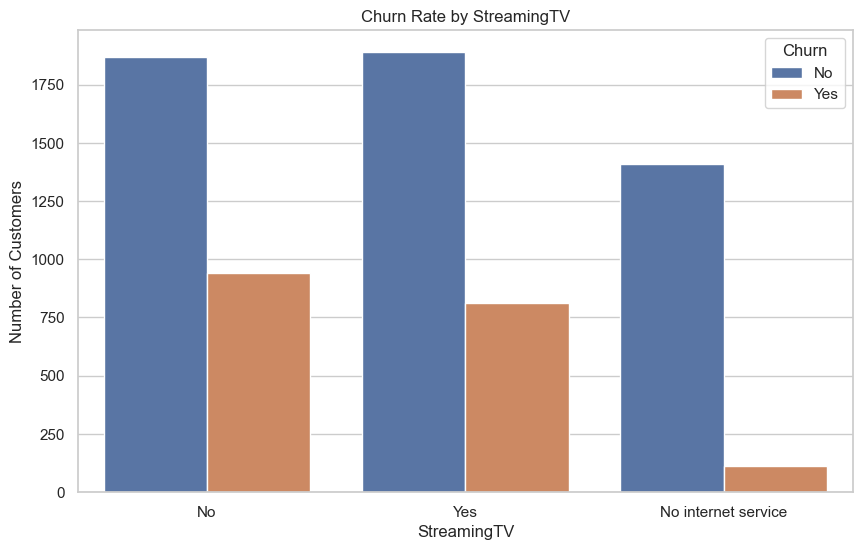

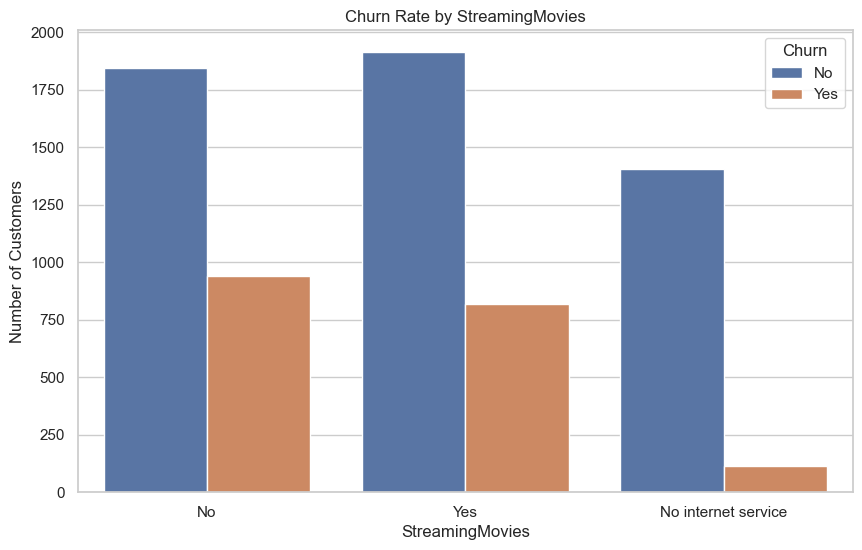

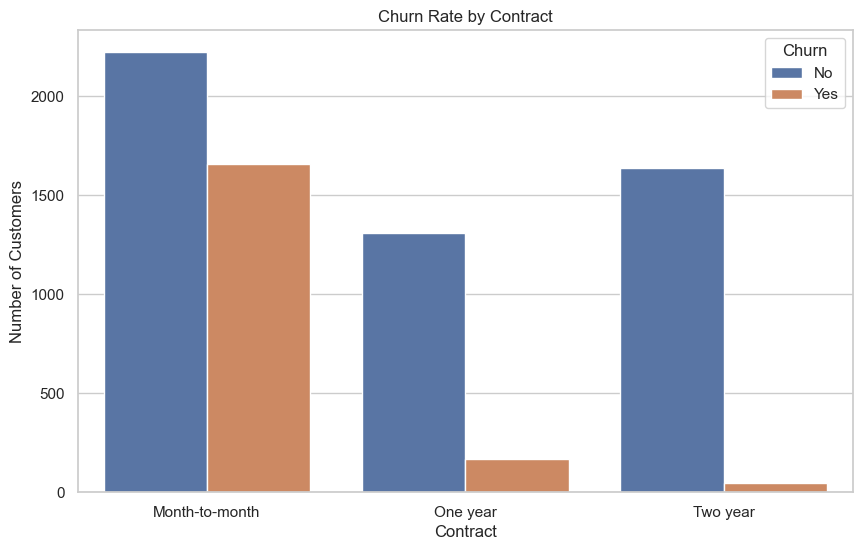

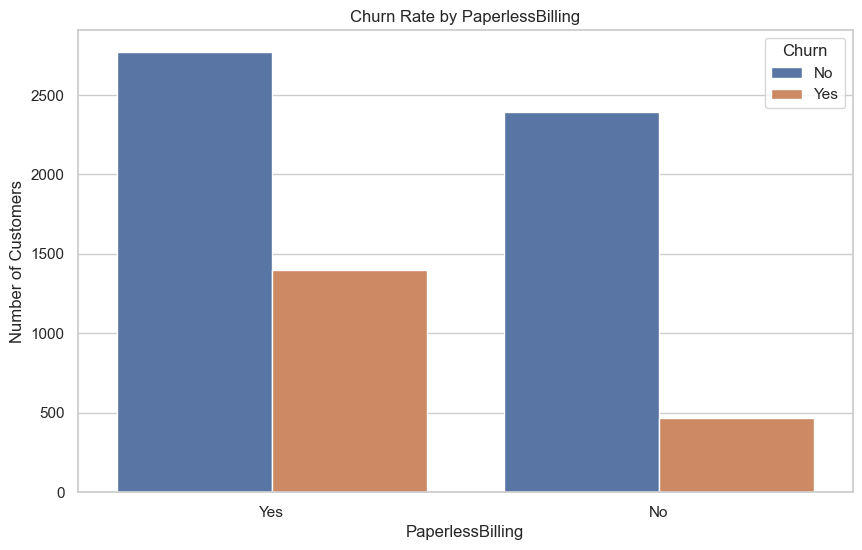

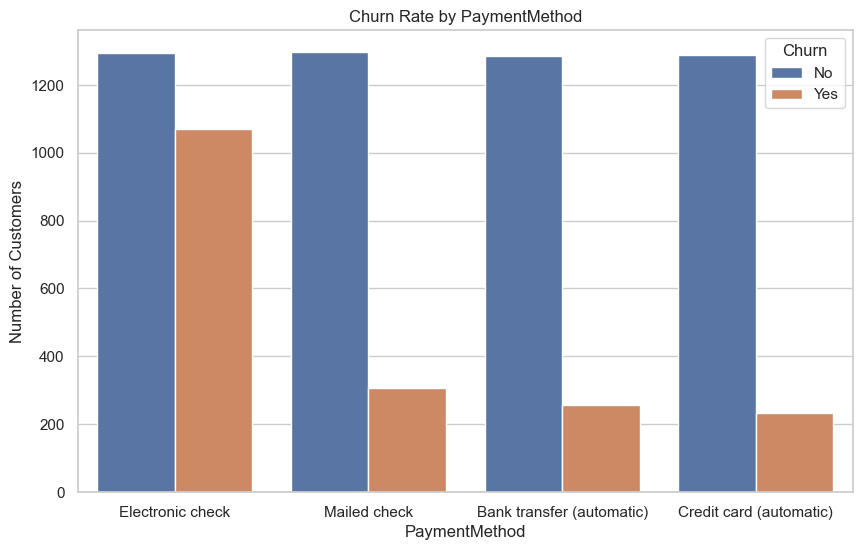

In [4]:
# --- 1. Identify Categorical Predictor Variables ---
# We list them manually for clarity, excluding our target 'Churn'
categorical_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

print("--- EDA: Analyzing Categorical Features vs. Churn ---")

# --- 2. Loop and Plot (Count Plots) ---
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    
    # Create a count plot, splitting by the 'Churn' variable
    sns.countplot(data=df, x=col, hue='Churn')
    
    # Add titles and labels
    plt.title(f'Churn Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    
    # Rotate x-axis labels if they are long
    if df[col].nunique() > 4:
        plt.xticks(rotation=30)
    
    # Show the plot
    plt.show()

## Task 2 (Part 1): Data Preprocessing for CHAID

We are now starting Task 2: Model Development using CHAID.

The CHAID algorithm requires all of its predictor variables to be categorical. Our dataset currently has a mix of numerical and categorical features.

Our plan is to:
1.  **Discretize (Bin) Numerical Features**: Convert `tenure`, `MonthlyCharges`, and `TotalCharges` into categorical bins (e.g., 4 groups based on quantiles).
2.  **Encode All Features**: Apply `LabelEncoder` to *all* predictor columns. This will convert text categories (like 'Yes', 'No', 'DSL') into integers (like 1, 0, 2), which the CHAID library requires.
3.  **Split Data**: Separate our data into a training set (to build the model) and a testing set (to evaluate it later).

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# --- 1. Create a copy of the dataframe for CHAID preprocessing ---
# This ensures our original 'df' remains unchanged for other models
df_chaid = df.copy()

# --- 2. Discretize (Bin) Numerical Features ---
# We will use 'qcut' (quantile-cut) to split them into 4 equal-sized groups
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_features:
    df_chaid[col] = pd.qcut(df_chaid[col], q=4, duplicates='drop').astype(str)

# --- 3. Encode All Features (Predictors and Target) ---
# Separate predictors (X) and target (y)
X = df_chaid.drop('Churn', axis=1)
y = df_chaid['Churn']

# Apply LabelEncoder to all predictor columns in X
X_encoded = X.apply(LabelEncoder().fit_transform)

# Apply LabelEncoder to the target variable y
y_encoded = LabelEncoder().fit_transform(y)
# (In 'y', 'No' will become 0 and 'Yes' will become 1)

print("--- Data after Encoding (First 5 Rows) ---")
display(X_encoded.head())

# --- 4. Split Data into Training and Testing Sets ---
# We'll use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, 
    y_encoded, 
    test_size=0.2, 
    random_state=42
)

print(f"\nData split successfully:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

--- Data after Encoding (First 5 Rows) ---


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1
1,1,0,0,0,1,1,0,0,2,0,2,0,0,0,1,0,3,1,0
2,1,0,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,1
3,1,0,0,0,1,0,1,0,2,0,2,2,0,0,1,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,2,1



Data split successfully:
X_train shape: (5625, 19)
X_test shape: (1407, 19)
y_train shape: (5625,)
y_test shape: (1407,)


## Task 2 (Part 2): Build CHAID Model & Extract Rules

Now that our data is preprocessed, we can build the CHAID model.

1.  **Install Library**: We will first install the `CHAID` library, as it is not a default part of `scikit-learn`.
2.  **Build Tree**: We will instantiate the `Tree` object from the library and fit it on our training data (`X_train`, `y_train`). We'll set a `max_depth` (e.g., 5) to keep the tree from getting too large and to make the rules easier to interpret.
3.  **Extract Rules**: The key output of this model is the set of human-readable decision rules. We will print the resulting tree structure, which shows the "IF-THEN" logic that the model discovered. [cite_start]This directly addresses the assignment's requirement to "extract decision rules"[cite: 36].

In [8]:
# --- 1. Define Model Inputs ---
# We use 'df_chaid', the dataframe with binned numerical features
# and original string categories (e.g., 'Yes', 'No')
from CHAID import Tree

predictor_columns = [col for col in df_chaid.columns if col != 'Churn']
target_column = 'Churn'
column_types = {col: 'nominal' for col in predictor_columns}

# --- 2. Build the CHAID Tree (on the full dataset) ---
# The goal here is rule discovery, not prediction, so
# we use the full dataset to find all possible patterns.
print("--- Building CHAID Tree (max_depth=5) ---")
chaid_tree = Tree.from_pandas_df(
    df_chaid,                   # The dataframe with raw categories
    column_types,               # The dictionary mapping predictors to 'nominal'
    target_column,              # The name of the target column
    max_depth=5                 # Set the maximum depth to 5
)

# --- 3. Print the Decision Rules ---
print("\n--- CHAID Decision Rules (for Task 2 Report) ---")
chaid_tree.print_tree()

print("\nTask 2 complete. Please copy the rules above for your report.")

c:\Users\hp pavillion\AppData\Local\Programs\Python\Python310\lib\site-packages\CHAID\graph.py:13: UserWarning: Imports of optional packages needed to generate graphs failed. Please install with the "graph" option.
  warnings.warn(UserWarning('Imports of optional packages needed to generate graphs failed. Please install with the "graph" option.'))


--- Building CHAID Tree (max_depth=5) ---

--- CHAID Decision Rules (for Task 2 Report) ---
([], {'No': 5163.0, 'Yes': 1869.0}, (Contract, p=7.326182186265472e-257, score=1179.5458287339445, groups=[['Month-to-month'], ['One year'], ['Two year']]), dof=2))
|-- (['Month-to-month'], {'No': 2220.0, 'Yes': 1655.0}, (InternetService, p=8.853102500484912e-66, score=299.5796963499884, groups=[['DSL'], ['Fiber optic'], ['No']]), dof=2))
|   |-- (['DSL'], {'No': 829.0, 'Yes': 394.0}, (TotalCharges, p=6.320879510155006e-25, score=111.44153792675088, groups=[['(1397.475, 3794.738]', '(3794.738, 8684.8]'], ['(18.799, 401.45]'], ['(401.45, 1397.475]']]), dof=2))
|   |   |-- (['(1397.475, 3794.738]', '(3794.738, 8684.8]'], {'No': 229.0, 'Yes': 38.0}, (PhoneService, p=0.001875614417503133, score=9.667450235354163, groups=[['No'], ['Yes']]), dof=1))
|   |   |   |-- (['No'], {'No': 58.0, 'Yes': 19.0}, <Invalid Chaid Split> - the node only contains single category respondents)
|   |   |   +-- (['Yes'], 

## Task 3 (Part 2): Build & Train Models (Decision Tree and Logistic Regression)

Now that our data is fully numeric and split, we can build the two models for our comparison.

1.  **Model 1: Decision Tree Classifier**: This is our functional replacement for CHAID, as it's a tree-based model that can be used for prediction.
2.  [cite_start]**Model 2: Logistic Regression**: This is the second model required by the assignment[cite: 44].

We will:
1.  Import, initialize, and train both models on our `X_train` data.
2.  Get two types of predictions from each model on the `X_test` data:
    * **Class Predictions (`.predict()`)**: The final 'Yes' (1) or 'No' (0) guess. Used for calculating **Accuracy**.
    * **Probability Predictions (`.predict_proba()`)**: The model's confidence (e.g., "70% chance of churn"). This is required to calculate **ROC-AUC** and draw **Lift/Gains charts**.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# --- 1. Scale the Data (Important for Logistic Regression) ---

# Logistic Regression performs better when features are on a similar scale.
# Decision Trees don't require scaling, but it doesn't hurt them.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 2. Build and Train Model 1: Decision Tree ---
print("--- Training Decision Tree ---")
# We set max_depth=5 to match our CHAID tree and prevent overfitting
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)

# --- 3. Build and Train Model 2: Logistic Regression ---
print("--- Training Logistic Regression ---")
# 'max_iter' is increased to 1000 to ensure the model converges
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# --- 4. Get Predictions from Both Models ---
print("--- Generating predictions ---")

# Decision Tree predictions
y_pred_dt = dt_model.predict(X_test_scaled)
y_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1] # Get probability of churn (class 1)

# Logistic Regression predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1] # Get probability of churn (class 1)

print("Models trained and predictions generated successfully.")

--- Training Decision Tree ---
--- Training Logistic Regression ---
--- Generating predictions ---
Models trained and predictions generated successfully.


## Task 3 (Part 3): Model Comparison & Evaluation (Metrics)

This is the core of Task 3. We will now use the predictions we generated in the previous step to evaluate and compare our two models.

[cite_start]As required by the assignment, we will use the following metrics:
1.  **Accuracy**: The percentage of correct predictions.
2.  **ROC-AUC Score**: A measure of how well the model can distinguish between churners and non-churners.
3.  **ROC Curve**: A visual plot of the model's performance.
4.  **Gains and Lift Charts**: These are used to show the "lift" or "gain" from using the model, which is a key business metric.

We will need to install the `scikit-plot` library to easily create the Gains and Lift charts.

--- Model Comparison ---
Decision Tree Accuracy: 0.7669
Logistic Regression Accuracy: 0.7676

Decision Tree ROC-AUC Score: 0.8030
Logistic Regression ROC-AUC Score: 0.8105


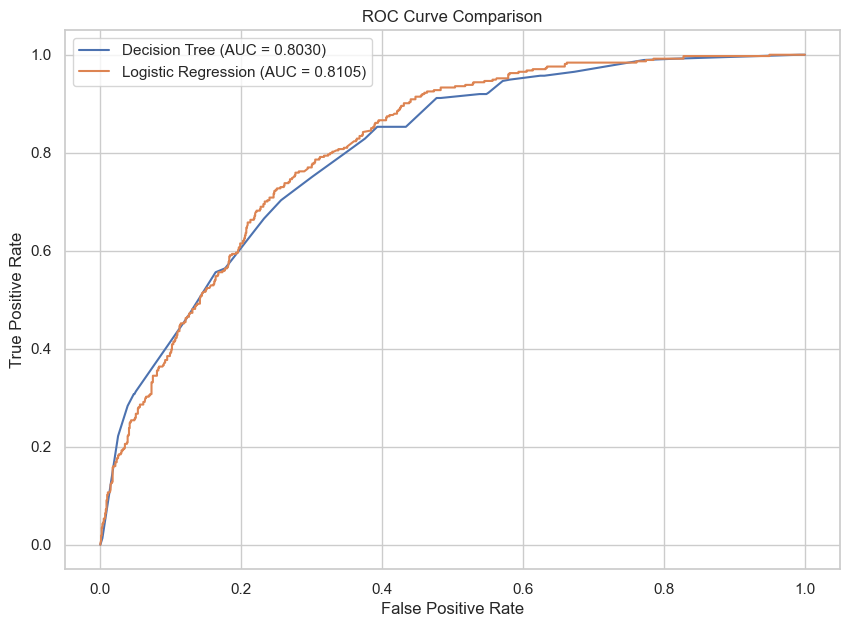


--- Gains Charts ---


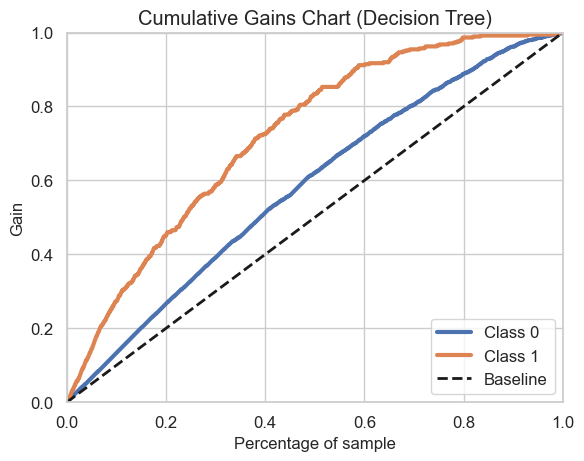

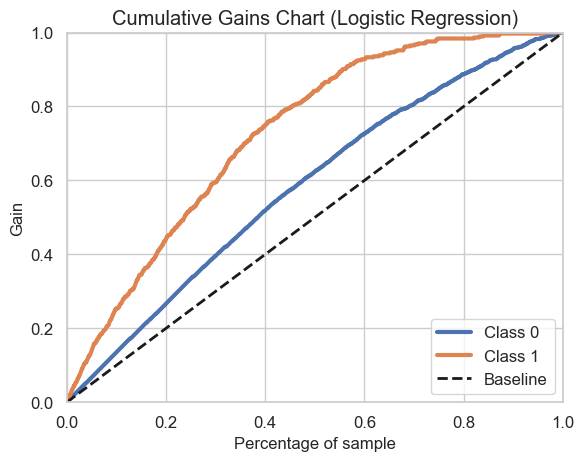


--- Lift Charts ---


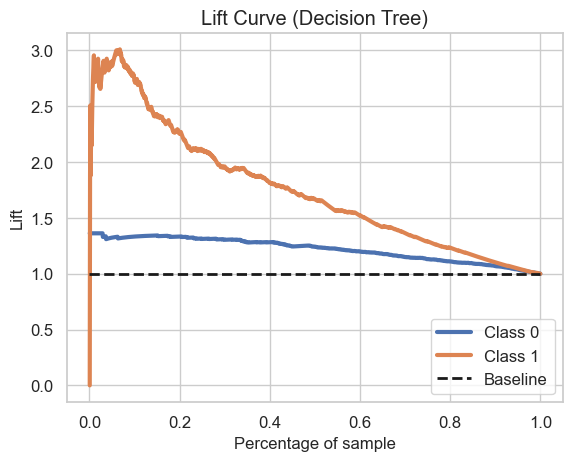

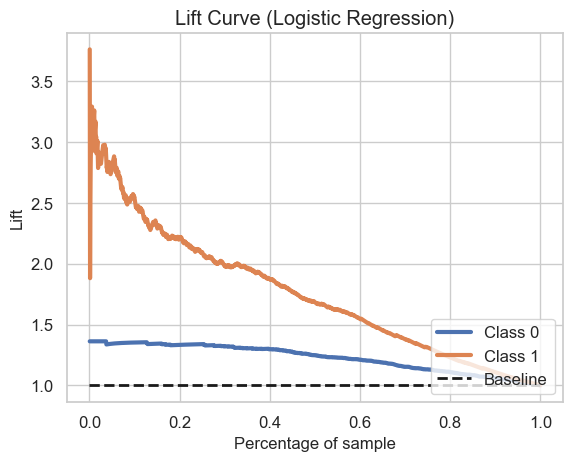


Task 3 (Evaluation) complete.


In [11]:
# --- 1. Import all necessary metrics libraries ---
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import scikitplot as skplt
import matplotlib.pyplot as plt

# --- 2. Calculate Accuracy ---
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_lr = accuracy_score(y_test, y_pred_lr)

print("--- Model Comparison ---")
print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")

# --- 3. Calculate ROC-AUC Score ---
auc_dt = roc_auc_score(y_test, y_proba_dt)
auc_lr = roc_auc_score(y_test, y_proba_lr)

print(f"\nDecision Tree ROC-AUC Score: {auc_dt:.4f}")
print(f"Logistic Regression ROC-AUC Score: {auc_lr:.4f}")

# --- 4. Plot ROC Curve ---
# (Removed the 'Random Guess' line as requested)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

plt.figure(figsize=(10, 7))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.4f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.4f})')
# plt.plot([0, 1], [0, 1], 'k--', label='Random Guess') # This line is now removed
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# --- 5. Plot Gains and Lift Charts (Corrected Method) ---
# The previous ValueError is a bug. We will fix it by
# plotting each model's chart in its own figure.

# Get the 2D probability arrays for both models
probas_dt = dt_model.predict_proba(X_test_scaled)
probas_lr = lr_model.predict_proba(X_test_scaled)

print("\n--- Gains Charts ---")
skplt.metrics.plot_cumulative_gain(y_test, probas_dt, title='Cumulative Gains Chart (Decision Tree)')
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, probas_lr, title='Cumulative Gains Chart (Logistic Regression)')
plt.show()

print("\n--- Lift Charts ---")
skplt.metrics.plot_lift_curve(y_test, probas_dt, title='Lift Curve (Decision Tree)')
plt.show()
skplt.metrics.plot_lift_curve(y_test, probas_lr, title='Lift Curve (Logistic Regression)')
plt.show()

print("\nTask 3 (Evaluation) complete.")

## Task 4: Model Deployment and Updating

This task requires us to *explain* the process for deploying and updating our churn model. We do not need to build a full application.

### 4.1 Model Deployment Process

The first step in deployment is to save (or "pickle") our best-performing model. Based on our ROC-AUC scores, the **Logistic Regression** model was our best model.

We will use the `joblib` library to save our trained `lr_model` and the `scaler` object (which is required for preprocessing new data) to disk.

**My Deployment Plan (for the report):**
1.  **Save Model:** Save the trained `lr_model` and `scaler` objects as `.joblib` files.
2.  **Build API:** Create a simple web API (using a framework like **Flask** or **FastAPI**).
3.  **Load Model:** The API will load the saved `lr_model` and `scaler` files when it starts.
4.  **Create Endpoint:** The API will have an endpoint (e.g., `/predict`) that accepts new customer data (as JSON).
5.  **Process & Predict:** The API will:
    * Receive the new data.
    * Apply the same One-Hot Encoding and scaling (using the saved `scaler`).
    * Pass the processed data to the `lr_model.predict_proba()` method.
    * Return a JSON response with the churn probability.

### 4.2 Model Updating Process

Models grow "stale" as new customer data and behaviors emerge.

**My Updating Plan (for the report):**
1.  **Collect New Data:** Set up a process to automatically collect and label new customer data (e.g., customers who churned in the last month).
2.  **Schedule Retraining:** Create a scheduled script (e.g., a monthly **CRON job** or **Airflow DAG**) that re-runs this entire notebook (from preprocessing to training) on the *new, combined* dataset.
3.  **Validate & Deploy:** After retraining, the script would automatically test the new model. If its performance (e.g., ROC-AUC) on a test set is better than the old model, the script will automatically save it, replacing the old `.joblib` file in the API.

In [12]:
import joblib

# --- 1. Save the Logistic Regression Model ---
# This was our best model
model_filename = 'churn_model_lr.joblib'
joblib.dump(lr_model, model_filename)

# --- 2. Save the Scaler ---
# We MUST save the scaler, as new data needs to be scaled
# in the exact same way as the training data.
scaler_filename = 'data_scaler.joblib'
joblib.dump(scaler, scaler_filename)

print(f"--- Task 4: Deployment ---")
print(f"Model saved as: {model_filename}")
print(f"Scaler saved as: {scaler_filename}")
print("\nThese two files are all you need for your API.")
print("You can now write the descriptive part of Task 4 in your report.")

--- Task 4: Deployment ---
Model saved as: churn_model_lr.joblib
Scaler saved as: data_scaler.joblib

These two files are all you need for your API.
You can now write the descriptive part of Task 4 in your report.
